##### Bank Marketing prediction
###### Problem statement is : Whether client will subscribe to the term deposit or not

#### Reading the data into python

This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

It has one file "BankData.csv". This file contains the historical data of client deposit of various applications.

The goal is to learn from this data and predict if client will subscribe to the term deposit or not

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
BankData=pd.read_csv('bank-additional-full.csv', encoding='latin',sep=';')
print('Shape before deleting duplicate values:', BankData.shape)

# Removing duplicate rows if any
BankData=BankData.drop_duplicates()
print('Shape After deleting duplicate values:', BankData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BankData.head(5)

Shape before deleting duplicate values: (41188, 21)
Shape After deleting duplicate values: (41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
BankData.rename(columns={'default':'default_credit',
                    'contact':'communication_type',
                    'emp.var.rate':'emp_var_rate',
                    'cons.price.idx':'cons_price_idx',
                    'cons.conf.idx':'cons_conf_idx',
                    'nr.employed':'no_of_employees',
                    'poutcome':'previous_outcome',
                     'housing':'house_loan',
                     'loan':'personal_loan',
                     'y':'Term_deposit'},inplace=True)

#### Defining the problem statement:

Create a Predictive model which can tell weather to approve a loan application or not?
Target Variable: Term_deposit
Predictors: Age, , communication_type, job,marital etc.

Term_depositTerm_deposit="N" means customer is not subscribing the term deposit .

Term_deposit="Y" means is subscribing the term deposit.

### Looking at the distribution of Target variable

1. If target variable's distribution is too skewed then the predictive modeling will not be possible.
2. Bell curve is desirable but slightly positive skew or negative skew is also fine
3. When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

In [58]:
BankData.shape

(41175, 21)

<AxesSubplot:xlabel='Term_deposit'>

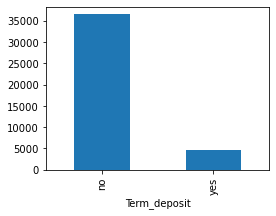

In [5]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=BankData.groupby('Term_deposit').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [6]:
value_counts_no  = BankData['Term_deposit'].value_counts()['no']
Rows = 41176
value_counts_per = (value_counts_no/Rows)*100
value_counts_per
print(value_counts_no)
print(value_counts_per)

36537
88.73372838546726


In [7]:
value_counts_yes  = BankData['Term_deposit'].value_counts()['yes']
Rows = 41176
value_counts_per = (value_counts_yes/Rows)*100
value_counts_per
print(value_counts_yes)
print(value_counts_per)

4639
11.266271614532737


In [8]:
BankData.head()

,age,job,marital,education,default_credit,house_loan,personal_loan,communication_type,month,day_of_week,...,campaign,pdays,previous,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,no_of_employees,Term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Basic Data Exploration

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, Does this column affect the approval or rejection of loan? If the answer is a clear "No" the remove the column immediately from the data otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

1. head() : This helps to see a few sample rows of the data
2. info() : This provides the summarized information of the data
3. describe() : This provides the descriptive statistical details of the data
4. nunique(): This helps us to identify if a column is categorical or continuous

In [9]:
# Looking at sample rows in the data
BankData.head()

,age,job,marital,education,default_credit,house_loan,personal_loan,communication_type,month,day_of_week,...,campaign,pdays,previous,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,no_of_employees,Term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41176 non-null  int64  
 1   job                 41176 non-null  object 
 2   marital             41176 non-null  object 
 3   education           41176 non-null  object 
 4   default_credit      41176 non-null  object 
 5   house_loan          41176 non-null  object 
 6   personal_loan       41176 non-null  object 
 7   communication_type  41176 non-null  object 
 8   month               41176 non-null  object 
 9   day_of_week         41176 non-null  object 
 10  duration            41176 non-null  int64  
 11  campaign            41176 non-null  int64  
 12  pdays               41176 non-null  int64  
 13  previous            41176 non-null  int64  
 14  previous_outcome    41176 non-null  object 
 15  emp_var_rate        41176 non-null  float64
 16  cons

In [11]:
# Looking at the descriptive statistics of the data
BankData.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,no_of_employees
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
# Replace 'unknown' values with NaN
BankData.replace('unknown', pd.NA, inplace=True)

# Drop rows with any NaN values and create a new DataFrame with non-missing data
bank_data_cleaned = BankData.dropna()

In [13]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BankData.nunique()

age                     78
job                     11
marital                  3
education                7
default_credit           2
house_loan               2
personal_loan            2
communication_type       2
month                   10
day_of_week              5
duration              1544
campaign                42
pdays                   27
previous                 8
previous_outcome         3
emp_var_rate            10
cons_price_idx          26
cons_conf_idx           26
euribor3m              316
no_of_employees         11
Term_deposit             2
dtype: int64

#### Visual Exploratory Data Analysis

1. Categorical variables: Bar plot, Pie Chart, Count Plot, Stacked Bar Plot
2. Continuous variables: Histogram, Scatter Plot, Box Plot, 

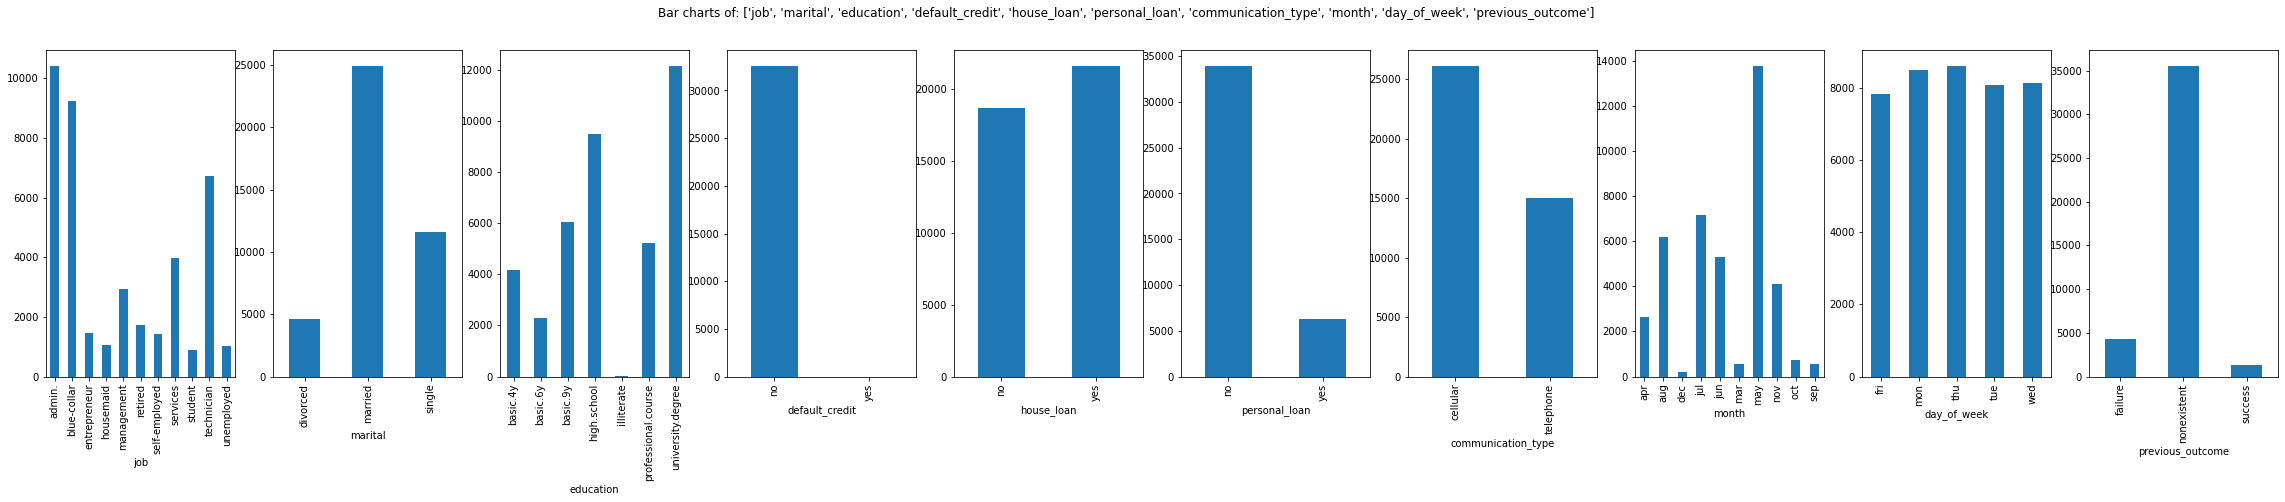

In [14]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=BankData, colsToPlot=['job', 'marital', 'education',
       'default_credit','house_loan', 'personal_loan', 'communication_type','month','day_of_week','previous_outcome'])

In [15]:
BankData.isnull().sum().sum()

12716

### Bar Charts Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "Education" column. Where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution like "Personal_loan" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except "Personal_loan" have satisfactory distribution for machine learning.

Selected Categorical Variables: All the categorical variables are selected.
'job', 'marital', 'education','default_credit','house_loan', 'personal_loan', 'communication_type','month','day_of_week','previous_outcome'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms


In [16]:
BankData.head()

,age,job,marital,education,default_credit,house_loan,personal_loan,communication_type,month,day_of_week,...,campaign,pdays,previous,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,no_of_employees,Term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>],
       [<AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'no_of_employees'}>, <AxesSubplot:>]],
      dtype=object)

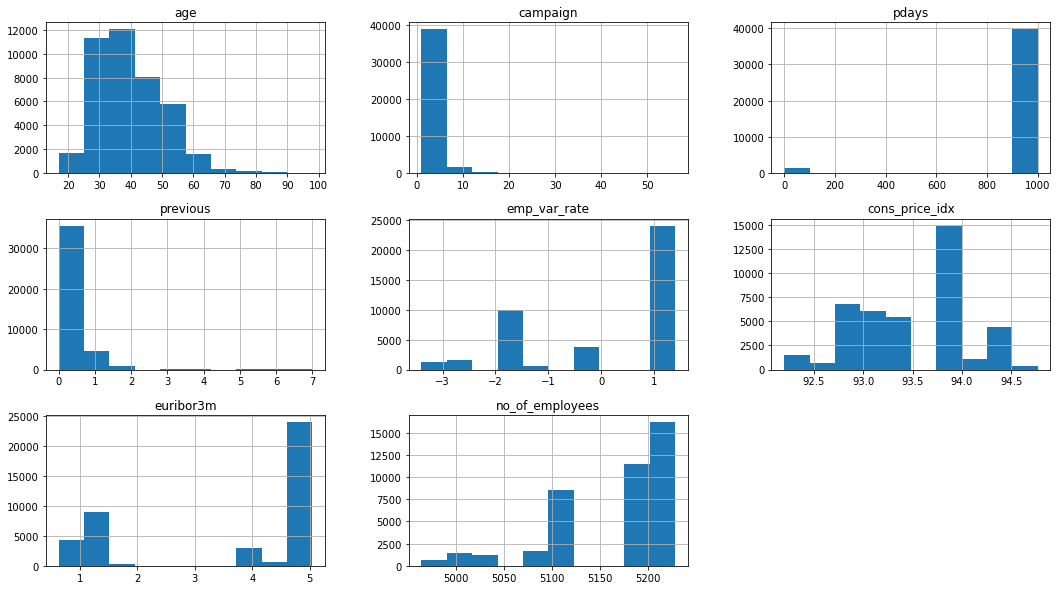

In [17]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
BankData.hist(['age', 'campaign','pdays','previous','emp_var_rate',
               'cons_price_idx','euribor3m','no_of_employees'], figsize=(18,10))

#### Outlier treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

1. Option-1: Delete the outlier Records. Only if there are just few rows lost.
2. Option-2: Impute the outlier values with a logical business value
3. Z-Score Method: Calculate the Z-score for each data point and remove data points that have a Z-score greater than a specified threshold. The Z-score measures how many standard deviations a data point is away from the mean. Typically, a Z-score threshold of ±3 is used to identify outliers.
4. IQR Method: Calculate the Interquartile Range (IQR) for each column, then identify and remove data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 is the 25th percentile and Q3 is the 75th percentile. This method is less sensitive to extreme values than the Z-score method.

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

## Data Preprocessing

### Replacing outliers for 'age'

In [18]:
# Finding nearest values to  mark
BankData['age'][BankData['age']>85].sort_values()

38206    86
40651    86
40001    86
39377    86
39011    86
38936    86
40718    86
40727    86
37743    87
27814    88
27802    88
40636    88
40631    88
40621    88
27805    88
27808    88
27810    88
27811    88
27813    88
38415    88
38410    88
27800    88
27815    88
37775    88
27816    88
37472    88
36183    88
30430    88
27817    88
27818    88
27812    88
39847    89
40639    89
38032    91
38022    91
40450    92
40469    92
39734    92
39655    92
38921    94
27826    95
38452    98
38455    98
Name: age, dtype: int64

In [19]:
# Replacing outliers with nearest possibe value
BankData['age'][BankData['age']>85] = 85

### Replacing outliers for 'campaign'

Outliers in campaign: [7 8 8 ... 7 9 7]
Number of Outliers in campaign: 2406


<AxesSubplot:xlabel='age'>

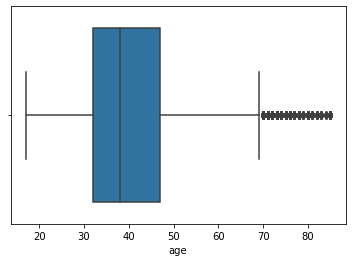

In [20]:
def outliers(col):
    Outliers=[]
    Q1=col.quantile(.25)
    Q3=col.quantile(.75)
    IQR=Q3-Q1
    Lower_bound=Q1-(1.5*IQR)
    Upper_bound=Q3+(1.5*IQR)
    for val in col:
        if val<Lower_bound or val>Upper_bound:
            Outliers.append(val)
    return np.array(Outliers)

import seaborn as sns
print("Outliers in campaign:",outliers(BankData.campaign))
print("Number of Outliers in campaign:",len(outliers(BankData.campaign)))
sns.boxplot(BankData.age)

In [21]:
# Finding nearest values to  mark
BankData['campaign'][BankData['campaign']>45].sort_values()

4107    56
Name: campaign, dtype: int64

In [22]:
BankData.drop(BankData[BankData['campaign'] > 45].index, inplace=True)

## Visualizing distribution after outlier treatment

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>]], dtype=object)

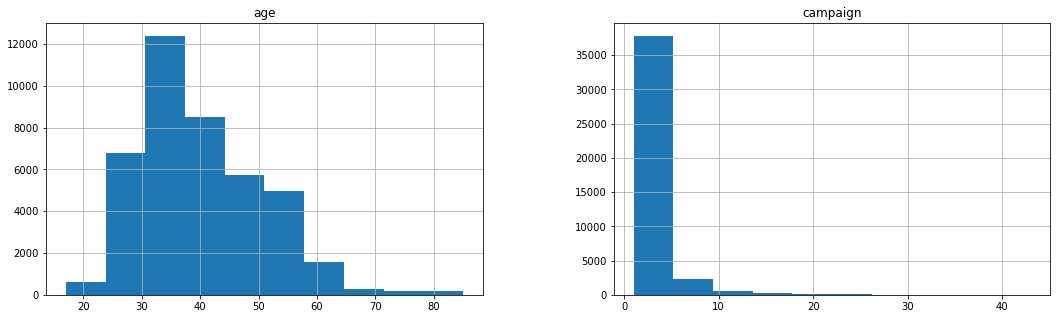

In [23]:
BankData.hist(['age', 'campaign'], figsize=(18,5))

### Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

1. Delete the missing value rows if there are only few records
2. mpute the missing values with MEDIAN value for continuous variables
3. Impute the missing values with MODE value for categorical variables
4. Interpolate the values based on nearby values
5. Interpolate the values based on business logic

In [24]:
# Finding how many missing values are there for each column
BankData.isnull().sum()

age                      0
job                    330
marital                 80
education             1730
default_credit        8595
house_loan             989
personal_loan          989
communication_type       0
month                    0
day_of_week              0
duration                 0
campaign                 0
pdays                    0
previous                 0
previous_outcome         0
emp_var_rate             0
cons_price_idx           0
cons_conf_idx            0
euribor3m                0
no_of_employees          0
Term_deposit             0
dtype: int64

In [25]:
BankData.shape

(41175, 21)

In [26]:
percentage_missing_job= (BankData['default_credit'].isnull().sum() / len(BankData)) * 100
percentage_missing_job

20.87431693989071

In [27]:
# When dealing with missing values in a categorical variable, imputing the mode is a common approach. 
# By filling in the missing values with the mode, we assign the most common category to the missing data
# there are no missing values in numerical columns

In [28]:
BankData['job'].fillna(BankData['job'].mode()[0], inplace=True)
BankData['marital'].fillna(BankData['marital'].mode()[0], inplace=True)
BankData['education'].fillna(BankData['education'].mode()[0], inplace=True)
BankData['house_loan'].fillna(BankData['house_loan'].mode()[0], inplace=True)
BankData['personal_loan'].fillna(BankData['personal_loan'].mode()[0], inplace=True)
BankData['default_credit'].fillna(BankData['default_credit'].mode()[0], inplace=True)

In [29]:
BankData.isnull().sum()

age                   0
job                   0
marital               0
education             0
default_credit        0
house_loan            0
personal_loan         0
communication_type    0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
previous_outcome      0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
no_of_employees       0
Term_deposit          0
dtype: int64

### Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

Visual exploration of relationship between variables

1. Continuous Vs Continuous ---- Scatter Plot
2. Categorical Vs Continuous---- Box Plot
3. Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables
1. Continuous Vs Continuous ---- Correlation matrix
2. Categorical Vs Continuous---- ANOVA test
3. Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present

1. Categorical Target Variable Vs Continuous Predictor
2. Categorical Target Variable Vs Categorical Predictor

### Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

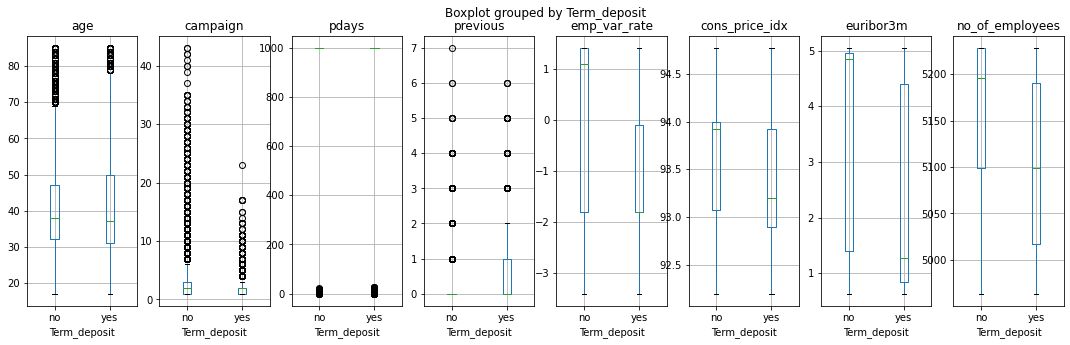

In [30]:
# Box plots for Categorical Target Variable "Term_deposit" and continuous predictors
ContinuousColsList=['age', 'campaign','pdays','previous','emp_var_rate',
               'cons_price_idx','euribor3m','no_of_employees']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    BankData.boxplot(column=PredictorCol, by='Term_deposit', figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Box-Plots interpretation


These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "pdays" Vs "Term_deposit". The boxes are in the same line! It means that people whose loan was rejected and whose loan was approved have same kind of incomes. Hence, I cannot distinguish between approval and rejection based on the income of an applicant. So this column is NOT correlated with the Loan_Status.

The other other two charts also exhibit same characteristics, hence all three continuous predictors are not correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

1. Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
2. ANOVA Test result: Probability of H0 being true

In [31]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
#         H0 means one variable is not affecting the other
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [32]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'campaign','pdays','previous','emp_var_rate',
               'cons_price_idx','euribor3m','no_of_employees']
FunctionAnova(inpData=BankData, TargetVariable='Term_deposit', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with Term_deposit | P-Value: 1.2714192143430193e-09
campaign is correlated with Term_deposit | P-Value: 1.4134354597136514e-41
pdays is correlated with Term_deposit | P-Value: 0.0
previous is correlated with Term_deposit | P-Value: 0.0
emp_var_rate is correlated with Term_deposit | P-Value: 0.0
cons_price_idx is correlated with Term_deposit | P-Value: 1.6867290041103158e-169
euribor3m is correlated with Term_deposit | P-Value: 0.0
no_of_employees is correlated with Term_deposit | P-Value: 0.0


['age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'euribor3m',
 'no_of_employees']

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

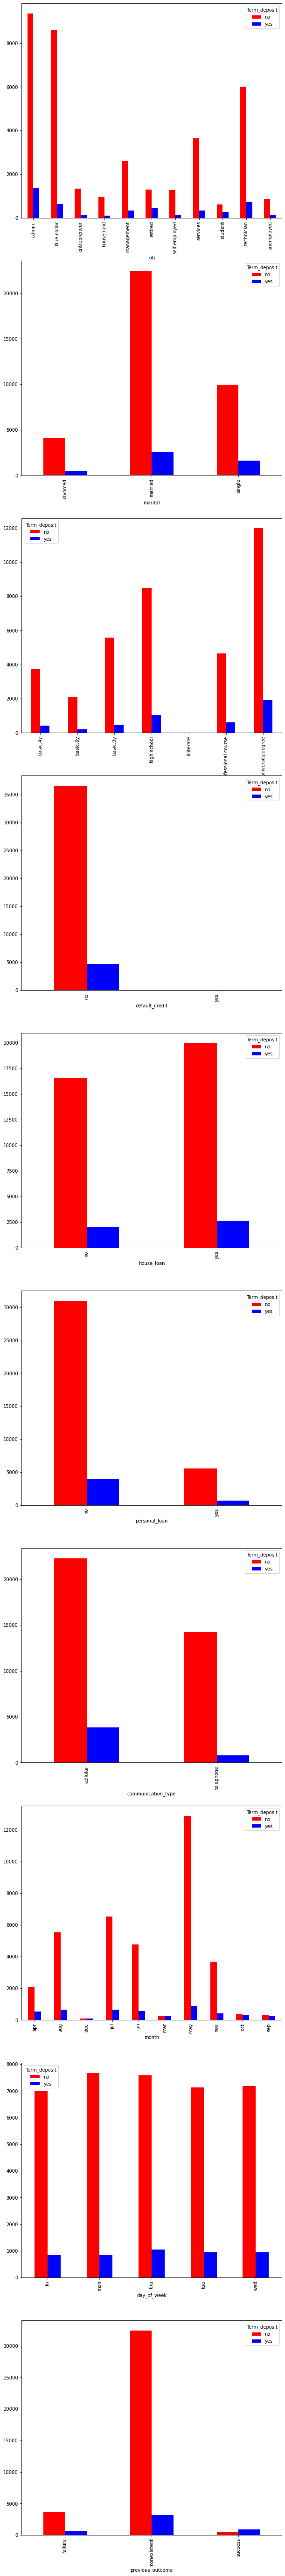

In [33]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['job', 'marital', 'education',
       'default_credit','house_loan', 'personal_loan', 'communication_type','month','day_of_week','previous_outcome']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,100))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=BankData[CategoricalCol], columns=BankData['Term_deposit'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

#### Grouped Bar charts Interpretation


These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the Personal loan Vs term_deposit plot. The approved vs rejected ratio is similar, it means Personal loan does not affect the term deposit!. Hence, these two variables are not correlated.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

1. Assumption(H0): The two columns are NOT related to each other
2. Result of Chi-Sq Test: The Probability of H0 being True

In [34]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [35]:
CategoricalVariables=['job', 'marital', 'education',
       'default_credit','house_loan', 'personal_loan', 'communication_type','month','day_of_week','previous_outcome']

# Calling the function
FunctionChisq(inpData=BankData, 
              TargetVariable='Term_deposit',
              CategoricalVariablesList= CategoricalVariables)

job is correlated with Term_deposit | P-Value: 5.241310063035744e-200
marital is correlated with Term_deposit | P-Value: 5.149899987288422e-27
education is correlated with Term_deposit | P-Value: 9.706817087092988e-39
default_credit is NOT correlated with Term_deposit | P-Value: 1.0
house_loan is correlated with Term_deposit | P-Value: 0.024606722237329643
personal_loan is NOT correlated with Term_deposit | P-Value: 0.3746929640491322
communication_type is correlated with Term_deposit | P-Value: 1.8231612351025737e-189
month is correlated with Term_deposit | P-Value: 0.0
day_of_week is correlated with Term_deposit | P-Value: 3.126811143694983e-05
previous_outcome is correlated with Term_deposit | P-Value: 0.0


['job',
 'marital',
 'education',
 'house_loan',
 'communication_type',
 'month',
 'day_of_week',
 'previous_outcome']

### Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [36]:
SelectedColumns=['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx',
                 'euribor3m', 'no_of_employees','job', 'marital', 'education', 'house_loan',
                  'communication_type', 'month', 'day_of_week', 'previous_outcome']

# Selecting final columns
DataForML=BankData[SelectedColumns]
DataForML.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,euribor3m,no_of_employees,job,marital,education,house_loan,communication_type,month,day_of_week,previous_outcome
0,56,1,999,0,1.1,93.994,4.857,5191.0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent
1,57,1,999,0,1.1,93.994,4.857,5191.0,services,married,high.school,no,telephone,may,mon,nonexistent
2,37,1,999,0,1.1,93.994,4.857,5191.0,services,married,high.school,yes,telephone,may,mon,nonexistent
3,40,1,999,0,1.1,93.994,4.857,5191.0,admin.,married,basic.6y,no,telephone,may,mon,nonexistent
4,56,1,999,0,1.1,93.994,4.857,5191.0,services,married,high.school,no,telephone,may,mon,nonexistent


In [37]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Converting categorical columns into numerical 

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()

### Converting the binary nominal variable to numeric using 1/0 mapping

In [38]:
# Treating the binary nominal variables first
DataForML['house_loan'].replace({'yes':1, 'no':0}, inplace=True)
DataForML['communication_type'].replace({'telephone':1, 'cellular':0}, inplace=True)
DataForML['marital'].replace({'married':2, 'single':1,'divorced':0}, inplace=True)
DataForML['previous_outcome'].replace({'nonexistent':2, 'failure':1,'success':0}, inplace=True)
# Looking at data after nominal treatment
DataForML.head()


,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,euribor3m,no_of_employees,job,marital,education,house_loan,communication_type,month,day_of_week,previous_outcome
0,56,1,999,0,1.1,93.994,4.857,5191.0,housemaid,2,basic.4y,0,1,may,mon,2
1,57,1,999,0,1.1,93.994,4.857,5191.0,services,2,high.school,0,1,may,mon,2
2,37,1,999,0,1.1,93.994,4.857,5191.0,services,2,high.school,1,1,may,mon,2
3,40,1,999,0,1.1,93.994,4.857,5191.0,admin.,2,basic.6y,0,1,may,mon,2
4,56,1,999,0,1.1,93.994,4.857,5191.0,services,2,high.school,0,1,may,mon,2


In [39]:
BankData['previous_outcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [40]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Term_deposit']=BankData['Term_deposit']

# Printing sample rows
DataForML_Numeric.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,euribor3m,no_of_employees,marital,house_loan,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,Term_deposit
0,56,1,999,0,1.1,93.994,4.857,5191.0,2,0,...,1,0,0,0,0,1,0,0,0,no
1,57,1,999,0,1.1,93.994,4.857,5191.0,2,0,...,1,0,0,0,0,1,0,0,0,no
2,37,1,999,0,1.1,93.994,4.857,5191.0,2,1,...,1,0,0,0,0,1,0,0,0,no
3,40,1,999,0,1.1,93.994,4.857,5191.0,2,0,...,1,0,0,0,0,1,0,0,0,no
4,56,1,999,0,1.1,93.994,4.857,5191.0,2,0,...,1,0,0,0,0,1,0,0,0,no


### Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [41]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'euribor3m', 'no_of_employees', 'marital',
       'house_loan', 'communication_type', 'previous_outcome', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'Term_deposit'],
      dtype='object')

In [42]:
# Separate Target Variable and Predictor Variables
TargetVariable='Term_deposit'
Predictors=['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'euribor3m', 'no_of_employees', 'marital',
       'house_loan', 'communication_type', 'previous_outcome', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

###  Handling imbalanced problem 

In [43]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)


print("Before SMOTE:",Counter(y_train))
print("After SMOTE:",Counter(y_smote))

Before SMOTE: Counter({'no': 25531, 'yes': 3291})
After SMOTE: Counter({'no': 25531, 'yes': 25531})


### Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [44]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Sanity check for the sampled data
print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_test.shape)
print(y_test.shape)

(28822, 45)
(28822,)
(12353, 45)
(12353,)


### Logistic Regression

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train_sm,y_train_sm)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94     10913
         yes       0.70      0.22      0.34      1440

    accuracy                           0.90     12353
   macro avg       0.80      0.60      0.64     12353
weighted avg       0.88      0.90      0.87     12353

[[10776   137]
 [ 1122   318]]
Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation:
 [0.83434938 0.83434938 0.83553132 0.83494138 0.83553132 0.83876185
 0.86231662 0.51328337 0.89935204 0.37695395]

Final Average Accuracy of the model: 0.77


### Decision Trees

DecisionTreeClassifier(max_depth=2)
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     10913
         yes       0.72      0.19      0.30      1440

    accuracy                           0.90     12353
   macro avg       0.81      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353

[[10808   105]
 [ 1170   270]]
Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation:
 [0.83434938 0.83434938 0.83434938 0.83434938 0.83434938 0.84106227
 0.83431001 0.12165197 0.91776041 0.37887978]

Final Average Accuracy of the model: 0.73


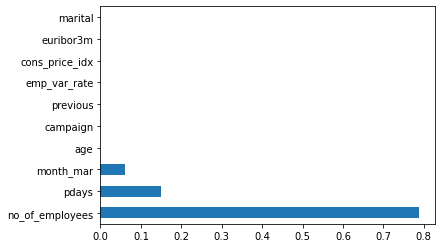

In [47]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train_sm,y_train_sm)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Random Forest

RandomForestClassifier(criterion='entropy', max_depth=100)
              precision    recall  f1-score   support

          no       0.91      0.97      0.94     10913
         yes       0.55      0.27      0.36      1440

    accuracy                           0.89     12353
   macro avg       0.73      0.62      0.65     12353
weighted avg       0.87      0.89      0.87     12353

[[10603   310]
 [ 1054   386]]
Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation:
 [0.83434938 0.826419   0.17422179 0.72457191 0.71376773 0.4028375
 0.38524041 0.11986616 0.32833773 0.17823698]

Final Average Accuracy of the model: 0.47


<AxesSubplot:>

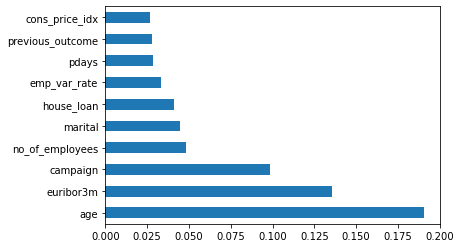

In [48]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, n_estimators=100,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train_sm,y_train_sm)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     10913
         yes       0.73      0.18      0.29      1440

    accuracy                           0.90     12353
   macro avg       0.81      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353

[[10814    99]
 [ 1176   264]]
Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation:
 [0.83434938 0.83434938 0.83434938 0.83434938 0.83434938 0.83876185
 0.83431001 0.51450139 0.89413062 0.2476444 ]

Final Average Accuracy of the model: 0.75


<AxesSubplot:>

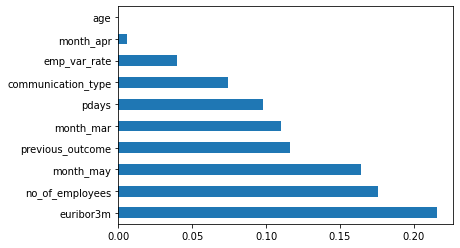

In [49]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train_sm,y_train_sm)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[12:47:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision

<AxesSubplot:>

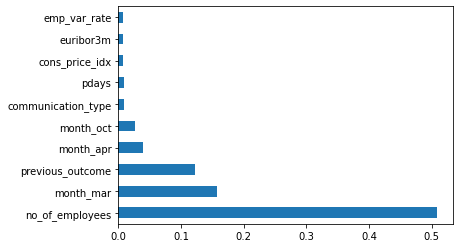

In [50]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train_sm,y_train_sm)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing XGBoost as the final model since it is very fast and I observe that it is using the predictors better by looking at its variable importance chart. It is not letting a single predictor dominate the decision, which is good.

In order to deploy the model we follow below steps

1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

In [51]:
# Separate Target Variable and Predictor Variables
TargetVariable='Term_deposit'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors = ['age','pdays','emp_var_rate','cons_price_idx','euribor3m','no_of_employees','marital','house_loan',
                'communication_type','previous_outcome','month_apr','month_may']

# We have selected new predictors so we have to feature scaling again

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(41175, 12)
(41175,)


In [52]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')
# Training the model on 100% Data available
FinalXGBTreeModel=clf.fit(X,y)

[12:50:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalXGBTreeModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[12:50:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:50:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:50:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:50:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [54]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalXGBTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalXGBTreeModel, fileWriteStream)
    
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Lenovo\Kaggle projects\Classification\Bank marketing


In [55]:
ls1 = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'euribor3m', 'no_of_employees', 'marital',
       'house_loan', 'communication_type', 'previous_outcome', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']
ls2 = ['age','pdays','emp_var_rate','cons_price_idx','euribor3m','no_of_employees','marital','house_loan',
                'communication_type','previous_outcome','month_apr','month_may']
sorted_unique_ls1 = sorted(set(ls1), key=ls1.index)

# Get unique elements from ls2 while maintaining the order
unique_ls2 = list(dict.fromkeys(ls2))

print("Sorted and unique elements of ls1:")
print(sorted_unique_ls1)

print("Unique elements of ls2:")
print(unique_ls2)

Sorted and unique elements of ls1:
['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'euribor3m', 'no_of_employees', 'marital', 'house_loan', 'communication_type', 'previous_outcome', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']
Unique elements of ls2:
['age', 'pdays', 'emp_var_rate', 'cons_price_idx', 'euribor3m', 'no_of_employees', 'marital', 'house_loan', 'communication_type', 'previous_outcome', 'month_apr', 'month_ma

In [56]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model  
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    # Treating the binary nominal variables first
    DataForML['house_loan'].replace({'yes':1, 'no':0}, inplace=True)
    DataForML['communication_type'].replace({'telephone':1, 'cellular':0}, inplace=True)
    DataForML['marital'].replace({'married':2, 'single':1,'divorced':0}, inplace=True)
    DataForML['previous_outcome'].replace({'nonexistent':2, 'failure':1,'success':0}, inplace=True)
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
       
    Predictors=['age','pdays','emp_var_rate','cons_price_idx','euribor3m','no_of_employees','marital','house_loan',
                'communication_type','previous_outcome','month_apr','month_may']
  
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalXGBTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [57]:
import pandas as pd

# Calling the function for some loan applications manualy
NewSampleData = pd.DataFrame(data=[[56, 999, 1.1,93.994,4.857,5191,
                                    'married','no','telephonic','nonexistent','may']],
                             columns=['age','pdays','emp_var_rate','cons_price_idx','euribor3m','no_of_employees','marital',
                                      'house_loan','communication_type','previous_outcome','month'])
                            
                                
print(NewSampleData)

# Calling the Function for prediction
PredictLoanStatus(InputData=NewSampleData)

   age  pdays  emp_var_rate  cons_price_idx  euribor3m  no_of_employees  \
0   56    999           1.1          93.994      4.857             5191   

   marital house_loan communication_type previous_outcome month  
0  married         no         telephonic      nonexistent   may  


KeyError: "['marital', 'house_loan', 'communication_type', 'previous_outcome'] not in index"